<a href="https://colab.research.google.com/github/vasukiup/ProcessSequencePrediction/blob/master/Sonar_compare_KNN_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object
(208, 60) (145, 60) (63, 60)


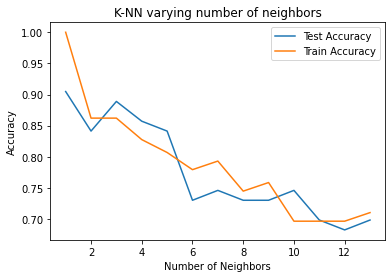

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#dataset[60].value_counts().plot(kind='bar')
X=dataset.drop(columns=60, axis=1)
Y=dataset[60]
print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=42)

#KNN models
neighbors = np.arange(1, 14)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

plt.title('K-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy' )
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.plot()

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(X.shape, X_train.shape, X_test.shape)
#print(X_train)
#print(y_train)


In [24]:
model=LogisticRegression()
model.fit(X_train, y_train)
knn.score(X_test, y_test)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predictied'], margins=True)


score=model.score(X_test, y_test)
print(score)

prediction=model.predict(X_test)
pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predictied'], margins=True)


0.8095238095238095


Predictied,M,R,All
True,,,
M,30,5,35
R,7,21,28
All,37,26,63
